Import dataset from Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alpacaender","key":"27a74dd46f06dff8acff18e28b6038ed"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d lukaanicin/book-covers-dataset

 96% 263M/275M [00:01<00:00, 164MB/s]
100% 275M/275M [00:01<00:00, 146MB/s]


In [7]:
# Unzip the file
! unzip book-covers-dataset.zip -d book-covers-dataset

Streaming output truncated to the last 5000 lines.
  inflating: book-covers-dataset/book-covers/Stationery/0000930.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000931.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000932.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000933.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000934.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000935.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000936.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000937.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000938.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000939.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000940.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000941.jpg  
  inflating: book-covers-dataset/book-covers/Stationery/0000942.jpg  
  inflating: book-covers-dataset/book-c

In [8]:
import PIL
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import time

In [9]:
# Read the csv file
df = pd.read_csv('book-covers-dataset/main_dataset.csv')

In [10]:
print(df.head(5))

                                               image  \
0  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
1  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
2  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
3  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   
4  https://d1w7fb2mkkr3kw.cloudfront.net/assets/i...   

                       name            author     format  \
0     This is Going to Hurt          Adam Kay  Paperback   
1   Thinking, Fast and Slow   Daniel Kahneman  Paperback   
2   When Breath Becomes Air    Paul Kalanithi  Paperback   
3        The Happiness Trap       Russ Harris  Paperback   
4  Man's Search For Meaning  Viktor E. Frankl  Paperback   

   book_depository_stars price currency  old_price           isbn category  \
0                    4.5   7.6        $       11.4  9781509858637  Medical   
1                    4.0  11.5        $       15.0  9780141033570  Medical   
2                    4.5  9.05        $       11.5  9781784701994  M

In [11]:
# Adjust the path
df['img_paths'] = df['img_paths'].str.replace("dataset","book-covers-dataset/book-covers")

In [12]:
# Basic parameters
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
trainset = tf.keras.utils.image_dataset_from_directory(
  "book-covers-dataset/book-covers",
  labels='inferred',
  label_mode='categorical',
)

Found 32581 files belonging to 33 classes.


In [ ]:
datagen = ImageDataGenerator( 
    rescale=1./255,
    horizontal_flip = True,
    validation_split=0.2)

In [ ]:
# Train set
train = datagen.flow_from_directory(
  "book-covers-dataset/book-covers",
  subset="training",
  seed=1321,
  target_size =(img_height, img_width),
  batch_size=batch_size)

Found 26083 images belonging to 33 classes.


In [ ]:
# Validation set
val =  datagen.flow_from_directory(
  "book-covers-dataset/book-covers",
  subset="validation",
  seed=1321,
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 6498 images belonging to 33 classes.


In [ ]:
class_names = trainset.class_names

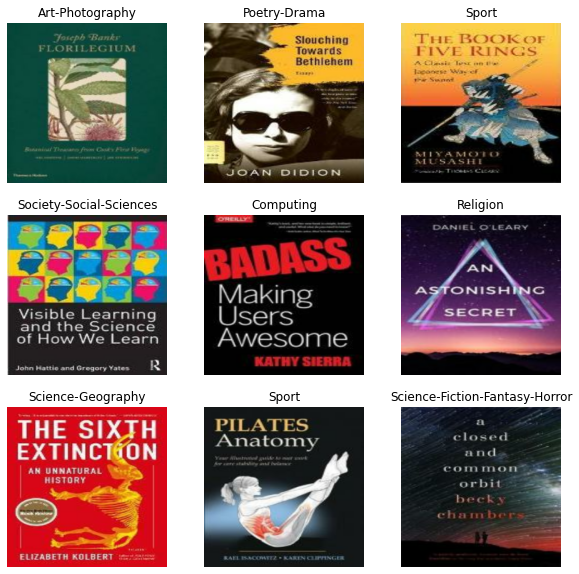

In [ ]:
# Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in trainset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    index = int(tf.where(labels[i]))
    plt.title(list(class_names)[index])
    ax.imshow(images[i] / 255)
    plt.axis('off')

In [ ]:
# Show the shape of the tensor
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 33)


In [ ]:
num_classes = len(class_names)

# Start with a base model
model = Sequential()
model.add(Conv2D(input_shape=(180,180,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
opt = Adam(lr=0.01)
model.compile(optimizer=opt,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                    

In [ ]:
t0 = time.time()

epochs=50
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=1,
)

print("Training time:", time.time()-t0)

Epoch 1/50
816/816 [==============================] - 50s 62ms/step - loss: 3.4987 - accuracy: 0.0306 - val_loss: 3.4980 - val_accuracy: 0.0303
Epoch 2/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4990 - accuracy: 0.0280 - val_loss: 3.4988 - val_accuracy: 0.0303
Epoch 3/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4994 - accuracy: 0.0287 - val_loss: 3.4985 - val_accuracy: 0.0303
Epoch 4/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4998 - accuracy: 0.0283 - val_loss: 3.4981 - val_accuracy: 0.0302
Epoch 5/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4996 - accuracy: 0.0285 - val_loss: 3.4980 - val_accuracy: 0.0303
Epoch 6/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4996 - accuracy: 0.0286 - val_loss: 3.4981 - val_accuracy: 0.0305
Epoch 7/50
816/816 [==============================] - 49s 60ms/step - loss: 3.4997 - accuracy: 0.0290 - val_loss: 3.4984 - val_accuracy:

Text(0.5, 1.0, 'Training and Validation Loss')

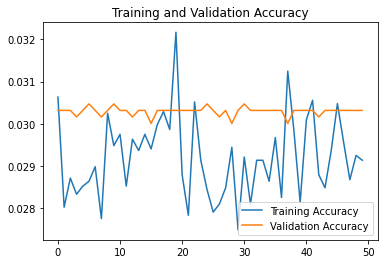

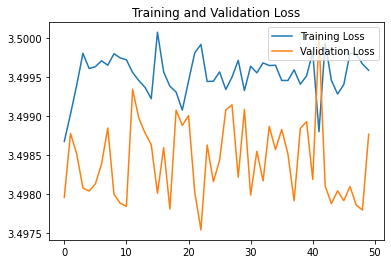

In [ ]:
# Plot the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Try to improve the performance

In [ ]:
# Create data augument
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
# create a learning rate scheduler
def adjust_learning_rate(epochs, lr):
  if epochs in [epochs/4,epochs/2,epochs*(3/4)]:
    lr = lr/10
  return lr
adjust_lr = tf.keras.callbacks.LearningRateScheduler(adjust_learning_rate)

In [ ]:
# check pointing callback
checkpoint_path = "model1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
checkpointing = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only = True,
                                                 verbose=1)

In [ ]:
# Add dara aumentation and dropout
model = None
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(input_shape=(180,180,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
opt = Adam(lr=0.01)
model.compile(optimizer=opt,
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
t0 = time.time()

epochs=50
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs,
  verbose=1,
  callbacks = [adjust_lr,checkpointing],
)

print("Training time:", time.time()-t0)

Epoch 1/50
816/816 [==============================] - ETA: 0s - loss: 3.4998 - accuracy: 0.0283
Epoch 1: val_loss improved from inf to 3.49652, saving model to model1/cp.ckpt
816/816 [==============================] - 64s 77ms/step - loss: 3.4998 - accuracy: 0.0283 - val_loss: 3.4965 - val_accuracy: 0.0303 - lr: 1.0000e-03
Epoch 2/50
816/816 [==============================] - ETA: 0s - loss: 3.4969 - accuracy: 0.0278
Epoch 2: val_loss did not improve from 3.49652
816/816 [==============================] - 61s 75ms/step - loss: 3.4969 - accuracy: 0.0278 - val_loss: 3.4965 - val_accuracy: 0.0303 - lr: 1.0000e-03
Epoch 3/50
816/816 [==============================] - ETA: 0s - loss: 3.4970 - accuracy: 0.0271
Epoch 3: val_loss did not improve from 3.49652
816/816 [==============================] - 61s 74ms/step - loss: 3.4970 - accuracy: 0.0271 - val_loss: 3.4965 - val_accuracy: 0.0303 - lr: 1.0000e-03
Epoch 4/50
816/816 [==============================] - ETA: 0s - loss: 3.4969 - accuracy: 

In [ ]:
# save the model
model.save_weights('model1/model1_final')

Text(0.5, 1.0, 'Training and Validation Loss')

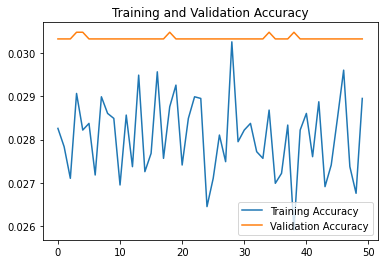

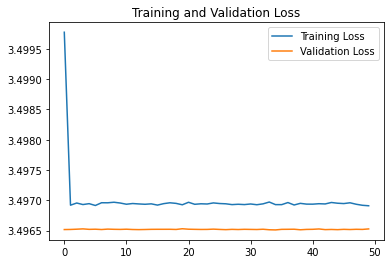

In [ ]:
# Plot the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Predict category with title

In [13]:
import itertools
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
from tensorflow.keras.utils import to_categorical

In [87]:
df2 = df[["name","category"]]

# Replace catgory strings to integers
category_set=[]
counter=-1
for i in range(len(df2.category)):
  if df2.category[i] not in category_set:
    counter+=1
    category_set.append(df2.category[i])
  df2.category[i] = counter


<ipython-input-87-8c3242429657>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.category[i] = counter


In [88]:
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)

def train_val_test_split(df=None, train_percent=0.7, test_percent=0.15, val_percent=0.15):
  df = df.sample(frac=1)
  train_df = df[: int(len(df)*train_percent)]
  test_df = df[int(len(df)*train_percent)+1 : int(len(df)*(train_percent+test_percent))]
  val_df = df[int(len(df)*(train_percent + test_percent))+1 : ]
  return train_df, test_df, val_df

train_df, test_df, val_df = train_val_test_split(df2, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,1], train_df.values[:,0]
val_labels, val_texts = val_df.values[:,1], val_df.values[:,0]
test_labels, test_texts = test_df.values[:,1], test_df.values[:,0]


In [14]:
# Tokenization
def process_tokens(text):
    """
    function to process tokens, replace any unwanted chars
    """
    preprocessed_text = text.lower().replace(",", "").replace(".", "").replace(":", "").replace(")", "").replace("-", "").replace("(", "")
    preprocessed_text = ''.join([i for i in preprocessed_text if not preprocessed_text.isdigit()])
    return preprocessed_text

def preprocessing(data):
    """
    preprocessing data to list of tokens
    """
    nlp = English()
    tokenizer = Tokenizer(nlp.vocab)
    preprocessed_data = []
    for sentence in data:
        sentence = process_tokens(sentence)
        tokens = tokenizer(sentence)
        tlist = []
        for token in tokens:
            tlist.append(str(token))
        preprocessed_data.append(tlist)
    return preprocessed_data


In [89]:
train_data = preprocessing(train_texts)
val_data = preprocessing(val_texts)
test_data = preprocessing(test_texts)

In [15]:
## Creating a vectorizer to vectorize text and create matrix of features
## Bag of words technique
class Vectorizer():
    def __init__(self, max_features):
        self.max_features = max_features
        self.vocab_list = None
        self.token_to_index = None

    def fit(self, dataset):
        word_dict = {}
        for sentence in dataset:
            for token in sentence:
                if token not in word_dict:
                    word_dict[token] = 1
                else:
                    word_dict[token] += 1
        word_dict = dict(sorted(word_dict.items(), key=lambda item: item[1], reverse=True))
        end_to_slice = min(len(word_dict), self.max_features)
        word_dict = dict(itertools.islice(word_dict.items(), end_to_slice))
        self.vocab_list = list(word_dict.keys())
        self.token_to_index = {}
        counter = 0
        for token in self.vocab_list:
            self.token_to_index[token] = counter
            counter += 1


    def transform(self, dataset):
        data_matrix = np.zeros((len(dataset), len(self.vocab_list)))
        for i, sentence in enumerate(dataset):
            for token in sentence:
                if token in self.token_to_index:
                    data_matrix[i, self.token_to_index[token]] += 1
        return data_matrix

In [90]:
## max features - top k words to consider only
max_features = 4000

In [91]:
vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)

## Checking if the len of vocab = k 
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
X_test = vectorizer.transform(test_data)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

vocab = vectorizer.vocab_list

In [92]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')

In [93]:
y_train = to_categorical(y_train, 33)
y_test = to_categorical(y_test, 33)
y_val = to_categorical(y_val, 33)

In [94]:
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

y_train = y_train.reshape(-1, 33)
y_val = y_val.reshape(-1, 33)
y_test = y_test.reshape(-1, 33)

In [95]:
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

X_train.shape: (22806, 1, 4000), y_train.shape: (22806, 33)


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [101]:
# RNN model
model = None
model = Sequential()
model.add(SimpleRNN(256, kernel_regularizer=regularizers.l2(0.001),input_shape=(1, max_features)))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=100)
print(history.history.keys())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_13 (SimpleRNN)   (None, 256)               1089792   
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 33)                8481      
                                                                 
Total params: 1,098,273
Trainable params: 1,098,273
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 2s 9ms/step - loss: 3.5291 - accuracy: 0.2159 - top_k_categorical_accuracy: 0.4718 - val_loss: 3.5919 - val_accuracy: 0.2388 - val_top_k_categorical_accuracy: 0.5281
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 3.5987 - a

In [102]:
score, acc, top_5_categorical_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)
print('Top 5 categorical accuracy:',top_5_categorical_accuracy)

Test loss: 3.260361671447754
Test accuracy: 0.26811298727989197
Top 5 categorical accuracy: 0.5970118641853333


Text(0.5, 1.0, 'Accuracy')

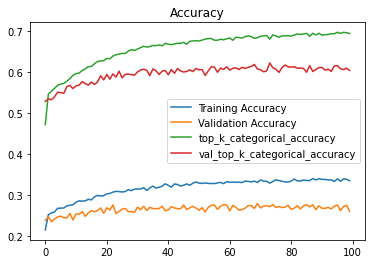

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
top_5_acc = history.history['top_k_categorical_accuracy']
val_top_5_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.plot(range(100), top_5_acc, label='top_k_categorical_accuracy')
plt.plot(range(100), val_top_5_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='center right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

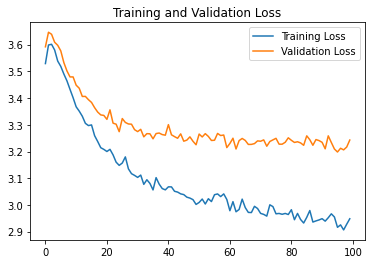

In [104]:
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [100]:
from tensorflow.keras.layers import LSTM

In [106]:
# LSTM model
model = None
model = Sequential()
model.add(LSTM(256, kernel_regularizer=regularizers.l2(0.001),input_shape=(1, max_features)))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=100)
print(history.history.keys())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               4359168   
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 33)                8481      
                                                                 
Total params: 4,367,649
Trainable params: 4,367,649
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 3s 11ms/step - loss: 3.5611 - accuracy: 0.1762 - top_k_categorical_accuracy: 0.4072 - val_loss: 3.6216 - val_accuracy: 0.2161 - val_top_k_categorical_accuracy: 0.5017
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 3.6693 - 

In [107]:
score, acc, top_5_categorical_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)
print('Top 5 categorical accuracy:',top_5_categorical_accuracy)

Test loss: 3.103273868560791
Test accuracy: 0.2738436460494995
Top 5 categorical accuracy: 0.607859194278717


Text(0.5, 1.0, 'Accuracy')

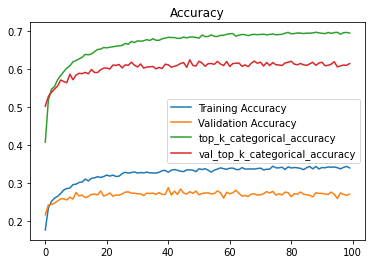

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
top_5_acc = history.history['top_k_categorical_accuracy']
val_top_5_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.plot(range(100), top_5_acc, label='top_k_categorical_accuracy')
plt.plot(range(100), val_top_5_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='center right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

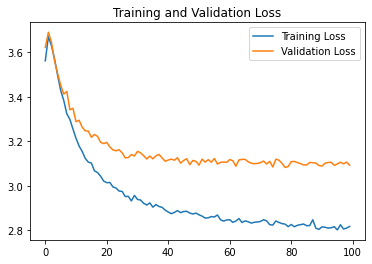

In [109]:
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [110]:
from tensorflow.keras.layers import GRU

In [111]:
# GRU model
model = None
model = Sequential()
model.add(GRU(256, kernel_regularizer=regularizers.l2(0.001),input_shape=(1, max_features)))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=100)
print(history.history.keys())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 256)               3270144   
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 33)                8481      
                                                                 
Total params: 3,278,625
Trainable params: 3,278,625
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 3s 11ms/step - loss: 3.5604 - accuracy: 0.1968 - top_k_categorical_accuracy: 0.4420 - val_loss: 3.6451 - val_accuracy: 0.2282 - val_top_k_categorical_accuracy: 0.5116
Epoch 2/100
90/90 [==============================] - 0s 6ms/step - loss: 3.6357 - 

In [112]:
score, acc, top_5_categorical_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)
print('Top 5 categorical accuracy:',top_5_categorical_accuracy)

Test loss: 3.1028494834899902
Test accuracy: 0.2771182954311371
Top 5 categorical accuracy: 0.6002865433692932


Text(0.5, 1.0, 'Accuracy')

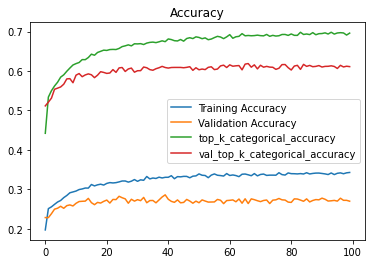

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
top_5_acc = history.history['top_k_categorical_accuracy']
val_top_5_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.plot(range(100), top_5_acc, label='top_k_categorical_accuracy')
plt.plot(range(100), val_top_5_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='center right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

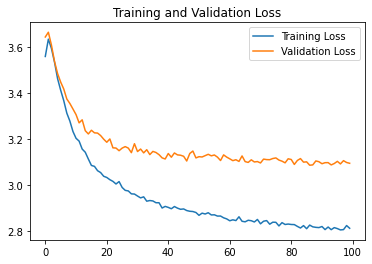

In [114]:
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Find the title in the cover

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,930 kB/s)
debconf: unable to initi

In [ ]:
from PIL import Image
from pytesseract import pytesseract

In [ ]:
extractedInformation=[]
for i in range(len(df['img_paths'])):
  if i%100 == 0:
    print(i)
  extractedInformation.append(pytesseract.image_to_string(Image.open(df['img_paths'][i])))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [ ]:
df['extractedInformation'] = extractedInformation

In [ ]:
print(df['extractedInformation'])

0                                                      \n
1         \n\nThe International\nBestseller\n\nThinking...
2              \n\nBECOMES\n\nPAUL KALANITHI\n\n: AIR ©\n
3          RUSS HARRIS\nHAPPINESS\nTRAP\n\nStart Living\n
4                              Search Foi\nMeaning\n\n \n
                               ...                        
32576                                             \n\n \n
32577                                                  \n
32578                                                  \n
32579                                                  \n
32580                                                  \n
Name: extractedInformation, Length: 32581, dtype: object


In [ ]:
# Replace \n with empty space
df['extractedInformation'] = df['extractedInformation'].replace('\n',' ', regex=True)

In [ ]:
counter = 0 
for i in range(len(df['extractedInformation'])):
  if df["name"][i].lower() in df['extractedInformation'][i].lower():
    counter +=1

print("The ratio that tesseract recognizes the title:",counter/len(df['extractedInformation']))

The ratio that tesseract recognizes the title: 0.06387158159663607


In [ ]:
df3 = df[['extractedInformation','category']]

In [ ]:
print(df3)

                                    extractedInformation  \
0                                                         
1         The International Bestseller  Thinking, Fas...   
2                     BECOMES  PAUL KALANITHI  : AIR ©    
3             RUSS HARRIS HAPPINESS TRAP  Start Living    
4                                Search Foi Meaning       
...                                                  ...   
32576                                                     
32577                                                     
32578                                                     
32579                                                     
32580                                                     

                    category  
0                    Medical  
1                    Medical  
2                    Medical  
3                    Medical  
4                    Medical  
...                      ...  
32576  Travel-Holiday-Guides  
32577  Travel-Holiday-Guides  


In [ ]:
# Delete empty rows
df3['extractedInformation']=df3['extractedInformation'].str.replace(" ","")
for i in range(len(df3)):
  if len(df3['extractedInformation'][i])== 1:
    df3.drop([i],inplace=True)

<ipython-input-362-59a6d4ad7253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['extractedInformation']=df3['extractedInformation'].str.replace(" ","")
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df3.reset_index(inplace=True)

In [ ]:
df3.drop(columns=['index'],inplace=True)

In [ ]:
# Replace catgory strings to integers
category_set=[]
counter=-1
for i in range(len(df3.category)):
  if df3.category[i] not in category_set:
    counter+=1
    category_set.append(df3.category[i])
  df3.category[i] = counter


<ipython-input-365-0bad5cca3437>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.category[i] = counter


In [ ]:
val_size = int(df3.shape[0] * 0.15)
test_size = int(df3.shape[0] * 0.15)

train_df, test_df, val_df = train_val_test_split(df3, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,1], train_df.values[:,0]
val_labels, val_texts = val_df.values[:,1], val_df.values[:,0]
test_labels, test_texts = test_df.values[:,1], test_df.values[:,0]

In [ ]:
train_data = preprocessing(train_texts)
val_data = preprocessing(val_texts)
test_data = preprocessing(test_texts)

max_features = 4000

In [ ]:
vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)

## Checking if the len of vocab = k 
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
X_test = vectorizer.transform(test_data)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

vocab = vectorizer.vocab_list

In [ ]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')

In [ ]:
y_train = to_categorical(y_train, 33)
y_test = to_categorical(y_test, 33)
y_val = to_categorical(y_val, 33)

In [ ]:
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

y_train = y_train.reshape(-1, 33)
y_val = y_val.reshape(-1, 33)
y_test = y_test.reshape(-1, 33)

In [ ]:
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

X_train.shape: (11181, 1, 4000), y_train.shape: (11181, 33)


In [ ]:
# RNN model
model = None
model = Sequential()
model.add(SimpleRNN(256, kernel_regularizer=regularizers.l2(0.0005),input_shape=(1, max_features)))
model.add(Dropout(0.2))
model.add(Dense(33, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=100)
print(history.history.keys())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, 256)               1089792   
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 33)                8481      
                                                                 
Total params: 1,098,273
Trainable params: 1,098,273
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
44/44 [==============================] - 1s 12ms/step - loss: 3.5963 - accuracy: 0.0364 - top_k_categorical_accuracy: 0.1831 - val_loss: 3.6247 - val_accuracy: 0.0342 - val_top_k_categorical_accuracy: 0.1904
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 3.6072 - 

In [ ]:
score, acc, top_5_categorical_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)
print('Top 5 categorical accuracy:',top_5_categorical_accuracy)

Test loss: 4.147259712219238
Test accuracy: 0.03256785124540329
Top 5 categorical accuracy: 0.25636744499206543


Text(0.5, 1.0, 'Accuracy')

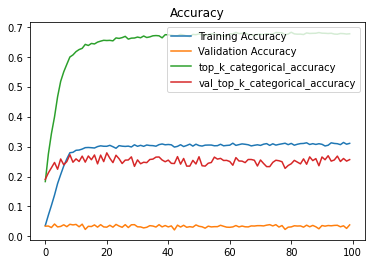

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
top_5_acc = history.history['top_k_categorical_accuracy']
val_top_5_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.plot(range(100), top_5_acc, label='top_k_categorical_accuracy')
plt.plot(range(100), val_top_5_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='upper right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

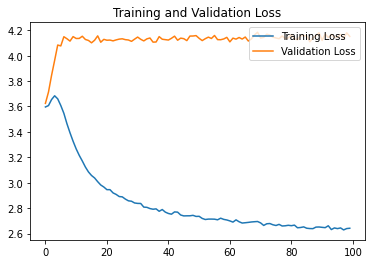

In [ ]:
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

Decrease the number of categories

In [48]:
df4 = df[["name","category"]]
df4 = df4[(df4.category=="Art-Photography")|(df4.category=="Biography")|(df4.category=="Business-Finance-Law")|(df4.category=="Childrens-Books")|(df4.category=="Computing")|(df4.category=="Crafts-Hobbies")|(df4.category=="Crime-Thriller")|(df4.category=="Dictionaries-Languages")|(df4.category=="Entertainment")|(df4.category=="Food-Drink")]

df4.reset_index(inplace=True)
df4.drop(columns=['index'],inplace=True)

# Replace catgory strings to integers
category_set=[]
counter=-1
for i in range(len(df4.category)):
  if df4.category[i] not in category_set:
    counter+=1
    category_set.append(df4.category[i])
  df4.category[i] = counter

In [49]:
val_size = int(df4.shape[0] * 0.15)
test_size = int(df4.shape[0] * 0.15)

def train_val_test_split(df=None, train_percent=0.7, test_percent=0.15, val_percent=0.15):
  df = df.sample(frac=1)
  train_df = df[: int(len(df)*train_percent)]
  test_df = df[int(len(df)*train_percent)+1 : int(len(df)*(train_percent+test_percent))]
  val_df = df[int(len(df)*(train_percent + test_percent))+1 : ]
  return train_df, test_df, val_df

train_df, test_df, val_df = train_val_test_split(df4, 0.7, 0.15, 0.15)
train_labels, train_texts = train_df.values[:,1], train_df.values[:,0]
val_labels, val_texts = val_df.values[:,1], val_df.values[:,0]
test_labels, test_texts = test_df.values[:,1], test_df.values[:,0]


In [50]:
train_data = preprocessing(train_texts)
val_data = preprocessing(val_texts)
test_data = preprocessing(test_texts)

In [51]:
## max features - top k words to consider only
max_features = 4000

In [52]:
vectorizer = Vectorizer(max_features=max_features)
vectorizer.fit(train_data)

## Checking if the len of vocab = k 
X_train = vectorizer.transform(train_data)
X_val = vectorizer.transform(val_data)
X_test = vectorizer.transform(test_data)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

vocab = vectorizer.vocab_list

In [53]:
y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')

In [54]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

In [55]:
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_val = X_val.reshape(-1, 1, X_val.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

y_train = y_train.reshape(-1, 10)
y_val = y_val.reshape(-1, 10)
y_test = y_test.reshape(-1, 10)

In [56]:
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')

X_train.shape: (6903, 1, 4000), y_train.shape: (6903, 10)


In [83]:
# RNN model
model = None
model = Sequential()
model.add(SimpleRNN(256, kernel_regularizer=regularizers.l2(0.01),input_shape=(1, max_features)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy',tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
print(model.summary())
history = model.fit(X_train, y_train,
          batch_size=256,
          validation_data=(X_val, y_val),
          epochs=100)
print(history.history.keys())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 256)               1089792   
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,092,362
Trainable params: 1,092,362
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
27/27 [==============================] - 1s 15ms/step - loss: 2.9625 - accuracy: 0.3148 - top_k_categorical_accuracy: 0.7190 - val_loss: 2.5175 - val_accuracy: 0.3705 - val_top_k_categorical_accuracy: 0.7782
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 2.5627 - 

In [84]:
score, acc, top_5_categorical_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', acc)
print('Top 5 categorical accuracy:',top_5_categorical_accuracy)

Test loss: 2.113532543182373
Test accuracy: 0.5148850083351135
Top 5 categorical accuracy: 0.8714479207992554


Text(0.5, 1.0, 'Accuracy')

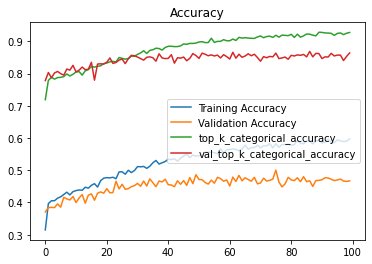

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
top_5_acc = history.history['top_k_categorical_accuracy']
val_top_5_acc = history.history['val_top_k_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(100), acc, label='Training Accuracy')
plt.plot(range(100), val_acc, label='Validation Accuracy')
plt.plot(range(100), top_5_acc, label='top_k_categorical_accuracy')
plt.plot(range(100), val_top_5_acc, label='val_top_k_categorical_accuracy')
plt.legend(loc='center right')
plt.title('Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

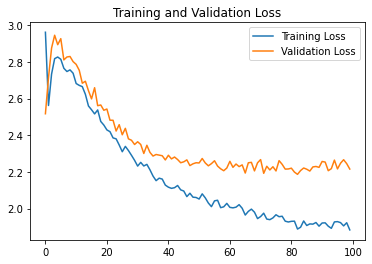

In [86]:
plt.plot(range(100), loss, label='Training Loss')
plt.plot(range(100), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')